# Linear Regression Practice 

This noteook will implement gradient descent using multivariate linear regression to predict wine quality. It will provide a full walkthrough of how I implemented the linear regression model, followed by an analysis of the performance of the model. 

In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
from tabulate import tabulate
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Loading the Data and perform feature scaling

First, we load the data and use feature normalization to ensure gradient descent converges much more quickly

In [2]:
# Load data
data = np.loadtxt(open("data/wineQuality.csv", "rb"), delimiter=",", skiprows=1)

# Create feature matrix and output variables
# Here, X denotes the feature matrix and y is the output
X = data[:, :-1]
y = data[:, -1]
m = y.size

# print out some data points
sample = data[:10, :]
table = [column for column in sample]
print(tabulate(table, headers=["X[0]", "X[1]", "X[2]", "X[3]", "X[4]", "X[5]", "X[6]", "X[7]", "X[8]", "X[9]", "X[10]", "quality (1-10)" ]))


  X[0]    X[1]    X[2]    X[3]    X[4]    X[5]    X[6]    X[7]    X[8]    X[9]    X[10]    quality (1-10)
------  ------  ------  ------  ------  ------  ------  ------  ------  ------  -------  ----------------
   7.4    0.7     0        1.9   0.076      11      34  0.9978    3.51    0.56      9.4                 5
   7.8    0.88    0        2.6   0.098      25      67  0.9968    3.2     0.68      9.8                 5
   7.8    0.76    0.04     2.3   0.092      15      54  0.997     3.26    0.65      9.8                 5
  11.2    0.28    0.56     1.9   0.075      17      60  0.998     3.16    0.58      9.8                 6
   7.4    0.7     0        1.9   0.076      11      34  0.9978    3.51    0.56      9.4                 5
   7.4    0.66    0        1.8   0.075      13      40  0.9978    3.51    0.56      9.4                 5
   7.9    0.6     0.06     1.6   0.069      15      59  0.9964    3.3     0.46      9.4                 5
   7.3    0.65    0        1.2   0.065      15

In [3]:
# This function returns a normalized version of the feature matrix
# Parameters: X = feature matrix
def featureNormalization(X):
    # create mu and sigma vector
    # mu[x] denotes the mean value of column x
    # sigma[x] denotes the standard deviation of column x
    X_normalized = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    # set the values of mu and sigma
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_normalized = (X - mu) / sigma
    
    # return normalized feature matrix, mu and sigma vector
    return X_normalized, mu, sigma

In [4]:
# call featureNormalization on the data
X_normalized, mu, sigma = featureNormalization(X)

print("Computed mean vector: ", mu)
print("\nComputed sigma vector: ", sigma)

Computed mean vector:  [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]

Computed sigma vector:  [1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]


Finally, before we use the feature matrix to compute the cost function, we must add the intercept term

In [5]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_normalized], axis=1)

### Cost Function

Next, we must implement the cost function for our multivariate linear regression model. This function computes the average of all the results of our linear hypothesis with inputs from our feature matrix compared to the actual output of our dataset. 

In [6]:
# Cost function for multivariate linear regression
# Parameters: X = feature matrix, y = output, theta = parameter vector
# Returns: cost = the computed cost of fitting data points using theta, the parameter vector
def costFunction(X, y, theta):
    
    # number of training examples
    n = y.shape[0]
    cost = 0
    # hypothesis
    h = X.dot(theta)
    
    # vectorized equation for cost function
    cost = (1/(2 * m)) * np.dot((h - y).T, (h - y))
    
    return cost

### Gradient Descent Algorithm

Using the cost function defined above, we now implement the gradient descent algorithm to train the model to find the optimal values for our parameter vector.

In [7]:
# Gradient Descent algorithm
# Parameters: X = feature matrix, y = output, theta = feature vector, alpha = learning rate, iterations = number of iterations
# Returns: theta: The learned parameter vector
#          costVector: a list containign the cost function after each iteration
def gradientDescent(X, y, theta, alpha, iterations):
    
    # copy the theta vector to be updated by gradient descent
    theta = theta.copy()
    m = y.shape[0]
    costVector = []
 
    for i in range(iterations):
        theta = theta - (alpha / m) * np.dot((np.dot(X, theta) - y), X)
        costVector.append(costFunction(X, y, theta))
    
    return theta, costVector

To make sure that the algorithm is implemented correctly, we can plot a graph of the learning rate over the number of iterations.

With alpha = 0.01 and iterations = 1000, the trained parameters are:

 [ 5.6357792   0.06170799 -0.18771198 -0.02630852  0.03067331 -0.08958595
  0.04495939 -0.1079882  -0.05749424 -0.0504479   0.15914227  0.27840208]


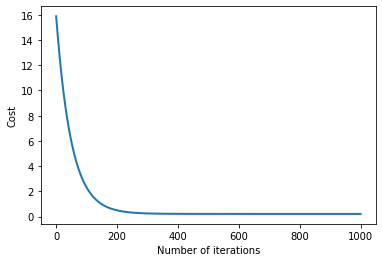

In [19]:
# Learning rate and number of iterations
alpha = 0.01
iterations = 1000

theta = np.zeros(X[0].shape)
theta, costVector = gradientDescent(X, y, theta, alpha, iterations)

# plot the gradient descent convergence
pyplot.plot(np.arange(len(costVector)), costVector, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost')

#output the trained parameter vector
print('With alpha = {} and iterations = {}, the trained parameters are:\n\n {}' .format(alpha, iterations, theta))
#print("The results trained linear regression model with alpha = {} and iterations = {} gives the following parameter vector: ", .format(alpha, iterations))